# Assessment 2 - Part 1: Machine Learning
<br>

## Task: train regression models that predict two indicators of energy efficiency based on 8 numerical inputs. 
<br>

### Packages needed:

- pandas
- sklearn
- numpy
- matplotlib

### 1.1 - Data Preparation

#### Importing libraries

In [10]:
## Imports
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

## Used for normalising the data
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

## Used for regression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

## Used for assessment of regression
from sklearn.metrics import mean_squared_error

## Used for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#### Loading the dataset

In [11]:
energy_data = pd.read_excel("data.xlsx")

energy_data.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


#### Extracting and splitting data

In [12]:
## Extracting Data

#inputs
inputs = energy_data.values[:,:8].astype(float)

#normalise the inputs
scaler = MinMaxScaler()
scaled_inputs = scaler.fit_transform(inputs)

#targets
targets_Y1 = energy_data["Y1"]
targets_Y2 = energy_data["Y2"]
targets =  energy_data.values[:,8:].astype(float)



#### Random Sample generator

In [13]:
sample = energy_data.sample(frac=1).reset_index(drop=True)

print( sample.head())

     X1     X2     X3      X4   X5  X6    X7  X8     Y1     Y2
0  0.62  808.5  367.5  220.50  3.5   4  0.40   2  17.26  16.86
1  0.62  808.5  367.5  220.50  3.5   2  0.40   5  16.54  16.88
2  0.98  514.5  294.0  110.25  7.0   3  0.40   3  32.69  33.24
3  0.90  563.5  318.5  122.50  7.0   4  0.25   5  31.53  37.19
4  0.79  637.0  343.0  147.00  7.0   2  0.10   3  35.78  43.12


#### Setting up train and test data

In [14]:
#set up data
x_train, x_test, y_joint_train, y_joint_test = train_test_split(scaled_inputs, targets, test_size=0.3)
x1_train, x1_test, y1_train, y1_test = train_test_split(scaled_inputs, targets_Y1, test_size=0.3)
x2_train, x2_test, y2_train, y2_test = train_test_split(scaled_inputs,targets_Y2, test_size=0.3)

### Task 1.2 - Regression

#### Regression using the "sklearn.neural_network.MLPRegressor"

In [15]:
MLP = MLPRegressor(max_iter=20000)
MLP.fit(x_train, y_joint_train)
MLP_Outputs = MLP.predict(x_train)

MLP_CV = abs(cross_val_score(MLP, x_test, y_joint_test, cv=5, scoring='neg_mean_squared_error'))
print(MLP_CV)

MLP_CV2 = abs(cross_val_score(MLP, x_train, y_joint_train, cv=5, scoring='neg_mean_squared_error'))
print(MLP_CV2)

[5.41760922 1.87291017 2.0171564  5.84317433 4.10376035]
[ 7.78171704  7.87102559  4.70239629  6.75375307 10.12529735]


#### Regression using the "sklearn.ensemble.RandomForestRegressor"

In [16]:
Forest = RandomForestRegressor()

Forest.fit(x_train, y_joint_train)
Forest_Outputs = Forest.predict(x_train)

Forest_CV = abs(cross_val_score(Forest, x_test, y_joint_test, cv=10, scoring='neg_mean_squared_error'))
print(Forest_CV)
Forest_CV2 = abs(cross_val_score(Forest, x_train, y_joint_train, cv=10, scoring='neg_mean_squared_error'))
print(Forest_CV2)


[2.45460948 1.98784559 2.53434515 1.73196923 2.35682454 2.8178745
 2.87726046 1.87596549 2.14514285 2.79577721]
[1.91834401 1.60614191 1.48406756 2.02263189 1.71410363 2.05424695
 1.99221936 3.13799218 1.62441562 2.35850279]


#### Regression using the "sklearn.svm.SVR"

In [17]:
SVR_poly = SVR()
SVR_1 = SVR_poly.fit(x_train, y1_train)
SVR_2 = SVR_poly.fit(x_train, y2_train)

SVR_Outputs = SVR_poly.predict(x_train)

SVR_1_CV = abs(cross_val_score(SVR_poly, x1_test, y1_test, cv=10, scoring='neg_mean_squared_error'))
SVR_2_CV = abs(cross_val_score(SVR_poly, x2_test, y2_test, cv=10, scoring='neg_mean_squared_error'))
print(SVR_1_CV)
print(SVR_2_CV)

SVR_1_CV1 = abs(cross_val_score(SVR_poly, x1_train, y1_train, cv=10, scoring='neg_mean_squared_error'))
SVR_2_CV2 = abs(cross_val_score(SVR_poly, x2_train, y2_train, cv=10, scoring='neg_mean_squared_error'))
print(SVR_1_CV1)
print(SVR_2_CV2)

[14.019766   10.3453682  11.89578255 10.80198316 10.83013988  7.30394643
 18.80963304 16.2486121   8.54575369  6.9259645 ]
[ 8.13011744 18.12308403 31.0589618  24.69367021 18.3058182   9.46852448
  7.2277232  13.12638973  5.02803479 20.98741523]
[ 7.7585983   5.39947642  8.41510334  9.58324971  8.02767305 11.27496411
  6.78306092 13.80547356  6.26957487  6.50668552]
[ 6.90193904 12.54041495  7.95899678 13.94150376  5.80950184 15.14146649
 15.03427225 13.95989265  5.40475407  7.44530976]


### Task 1.3 - Assessment of  Regression

#### Boxplot

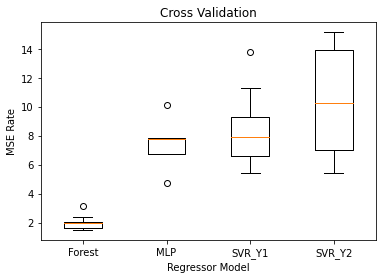

In [18]:
VALS_Data = [Forest_CV2, MLP_CV2, SVR_1_CV1, SVR_2_CV2]

# Creating plot
plt.boxplot(VALS_Data)
  
# Adding title 
plt.title("Cross Validation")

plt.xticks([1, 2, 3, 4], ['Forest', 'MLP', 'SVR_Y1', 'SVR_Y2'])
plt.xlabel('Regressor Model')
plt.ylabel('MSE Rate')

# show plot
plt.show()